## Object Oriented Programming
### Classes

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

A class in Python is like a blueprint for an object (function, array, set of variables). When the class is implemented you call it an "instance". You can create a class as follows:

In [2]:
class Particle():
    #initialization function is called when the class is created
    #has to take self as an argument
    def __init__(self, x, y, z, vx, vy, vz, m):
        #any variable that is initialized (doesn't come from args)
        #has to take the self kwarg
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.m = m
    def move(self, t):
        self.x += self.vx * t
        self.y += self.vy * t
        self.z += self.vz * t
    def pos(self):
        return np.array([self.x, self.y, self.z])
    def vel(self):
        return np.array([self.vx, self.vy, self.vz])
    def disp(self):
        return np.sqrt(self.x**2 + self.y**2 + self.z**2)
    def speed(self):
        return np.sqrt(self.vx**2 + self.vy**2 + self.vz**2)

Let's create an instance of the class

In [3]:
#particle of r = (0, 0, 0), v = (1, 0, 0) and mass = 1
p1 = Particle(0, 0, 0, 1, 0, 0, 1)

In [4]:
#look at a class' atributes
p1.pos(), p1.disp(), p1.vel(), p1.speed()

(array([0, 0, 0]), 0.0, array([1, 0, 0]), 1.0)

To call the methods of the class we do as follows:

In [5]:
p1.move(2)

In [6]:
#p1 should now have a different position
p1.pos(), p1.disp()

(array([2, 0, 0]), 2.0)

### Inheritance of Classes

A child class inherits all traits of the parent class but can be modified

In [7]:
#the child class takes as arg the parent class
class Proton(Particle):
    def __init__(self, x, y, z, vx, vy, vz):
        #we predefine the mass and add the charge
        self.q = 1.6e-19
        self.m = 9.11e-31
        #we call the init function of the parent class of proton
        #and we define the class the same but with the predefined mass
        super(Proton, self).__init__(x, y, z, vx, vy, vz, self.m)

In [8]:
p = Proton(0,0,0,1,0,0)

In [9]:
p.pos(), p.vel()

(array([0, 0, 0]), array([1, 0, 0]))

In [10]:
p.move(2)

In [11]:
p.pos()

array([2, 0, 0])

We can also define new methods in the child class, or modify already existing ones

In [12]:
class Proton(Particle):
    def __init__(self, x, y, z, vx, vy, vz):
        self.q = 1.6e-19
        self.m = 9.11e-31
        super(Proton, self).__init__(x, y, z, vx, vy, vz, self.m)
    #we modify the move functin to include E-field
    def move(self, t, Ex, Ey, Ez):
        self.x += self.vx * t + (1/2) * (self.q / self.m) * Ex * t**2
        self.y += self.vy * t + (1/2) * (self.q / self.m) * Ey * t**2
        self.z += self.vz * t + (1/2) * (self.q / self.m) * Ez * t**2
        self.vx += (self.q / self.m) * Ex * t
        self.vy += (self.q / self.m) * Ey * t
        self.vz += (self.q / self.m) * Ez * t

In [13]:
p = Proton(0,0,0,1,0,0)

In [14]:
p.pos(), p.vel()

(array([0, 0, 0]), array([1, 0, 0]))

In [15]:
p.move(t = 2, Ex = 4e-12, Ey = 9e-12, Ez = 0)

In [16]:
p.pos(), p.vel()

(array([3.4050494 , 3.16136114, 0.        ]),
 array([2.4050494 , 3.16136114, 0.        ]))

### Example: Projectile motion

In [17]:
class Projectile():
    #ro: initial position
    #vo: initial velocity
    #time of motion
    def __init__(self, ro, vo, g, t):
        self.t = t
        xo, yo = ro
        vxo, vyo, = vo
        self.x = xo + vxo * self.t
        self.y = yo + vyo * self.t + -(1/2) * g * self.t**2
    def peakY(self):
        return max(self.y)
    def peakX(self):
        return self.x[ np.argmax(self.y) ]
    def peakTime(self):
        return self.t[ np.argmax(self.y) ]
    def land(self):
        xAfterPeak = self.x[ self.t > self.peakTime() ]
        yAfterPeak = self.y[ self.t > self.peakTime() ]
        return xAfterPeak[ np.argmin( np.abs(yAfterPeak) ) ]

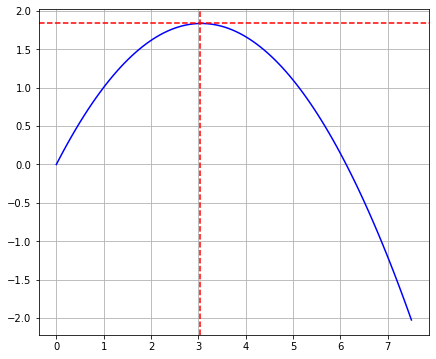

In [18]:
p = Projectile(ro = [0, 0],
               vo = [5,6],
               g = 9.8,
               t = np.linspace(0, 1.5, 100))

plt.figure(figsize = (7, 6))
plt.plot(p.x, p.y, 'blue')
plt.axhline(p.peakY(), color='red', ls='--')
plt.axvline(p.peakX(), color='red', ls='--')
plt.grid()
plt.show()

Let's define multiple instances

In [19]:
thetas = np.linspace(0, np.pi/2, 100)
vo = 10
vxs = vo * np.cos(thetas)
vys = vo * np.sin(thetas)

We can use list comprehension

In [20]:
#example
[i**2 for i in range(1, 11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [21]:
ps = [Projectile(ro = [0,0],
                vo = [vx,vy],
                g = 9.8,
                t = np.linspace(0,3,300)) for vx,vy in zip(vxs,vys)]

In [22]:
max_heights = [p.peakY() for p in ps]
x_landings = [p.land() for p in ps]

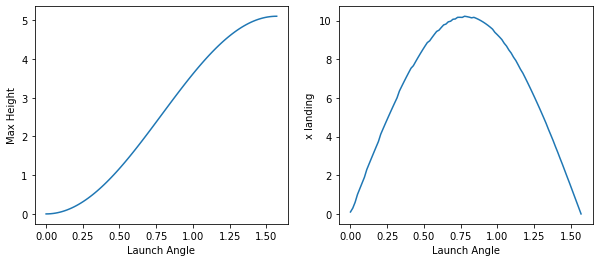

In [23]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(thetas, max_heights)
plt.xlabel("Launch Angle")
plt.ylabel("Max Height")
plt.subplot(122)
plt.plot(thetas, x_landings)
plt.xlabel("Launch Angle")
plt.ylabel("x landing")
plt.show()

More advanced class

In [24]:
class Projectiles():
    def __init__(self, ro, vos, g, t):
        self.ps = [Projectile(ro = ro,
                              vo = vo,
                              g = g,
                              t= t) for vo in vos]
    def max_heights(self):
        return [p.peakY() for p in self.ps]
    def x_landings(self):
        return [p.land() for p in self.ps]
    def get_projectiles(self):
        return self.ps

In [25]:
thetas = np.linspace(0, np.pi/2, 100)
vo = 10
vxs = vo*np.cos(thetas)
vys = vo*np.sin(thetas)

In [26]:
#we do as following to feed the vos to the function
np.array([vxs, vys]).T

array([[1.00000000e+01, 0.00000000e+00],
       [9.99874128e+00, 1.58659638e-01],
       [9.99496542e+00, 3.17279335e-01],
       [9.98867339e+00, 4.75819158e-01],
       [9.97986676e+00, 6.34239197e-01],
       [9.96854776e+00, 7.92499569e-01],
       [9.95471923e+00, 9.50560433e-01],
       [9.93838464e+00, 1.10838200e+00],
       [9.91954813e+00, 1.26592454e+00],
       [9.89821442e+00, 1.42314838e+00],
       [9.87438889e+00, 1.58001396e+00],
       [9.84807753e+00, 1.73648178e+00],
       [9.81928697e+00, 1.89251244e+00],
       [9.78802446e+00, 2.04806668e+00],
       [9.75429787e+00, 2.20310533e+00],
       [9.71811568e+00, 2.35758936e+00],
       [9.67948701e+00, 2.51147987e+00],
       [9.63842159e+00, 2.66473814e+00],
       [9.59492974e+00, 2.81732557e+00],
       [9.54902241e+00, 2.96920375e+00],
       [9.50071118e+00, 3.12033446e+00],
       [9.45000819e+00, 3.27067963e+00],
       [9.39692621e+00, 3.42020143e+00],
       [9.34147860e+00, 3.56886222e+00],
       [9.283679

In [29]:
ps = Projectiles(ro=[0,0],
                vos=np.array([vxs, vys]).T,
                g=9.8,
                t=np.linspace(0,3,300))

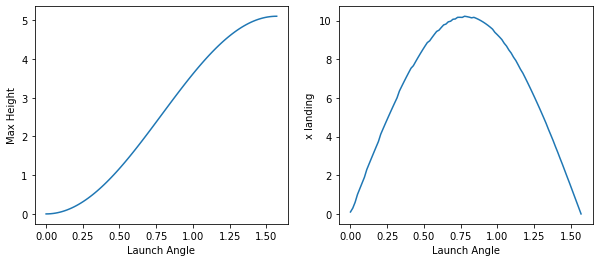

In [30]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(thetas, ps.max_heights())
plt.xlabel("Launch Angle")
plt.ylabel("Max Height")
plt.subplot(122)
plt.plot(thetas, ps.x_landings())
plt.xlabel("Launch Angle")
plt.ylabel("x landing")
plt.show()

#### Projectile motion in more depth

In [35]:
class Projectile():
    def __init__(self,r0,v0,t,F,m,*args):
        self.t = t
        self.x0, self.y0 = r0
        self.vx0, self.vy0 = v0
        self.F = F
        self.m = m
        self.args = args
    def solve_motion(self):
        def dSdt(t, S, *args):
            x, vx, y, vy = S
            return [vx, self.F(t,x,y,vx,vy,m,*args)[0]/self.m,
                    vy, self.F(t,x,y,vx,vy,m,*args)[1]/self.m]
        self.solution = solve_ivp(dSdt, [min(self.t), max(self.t)],
                                  [self.x0,self.vx0,self.y0,self.vy0],
                                  t_eval=self.t, args=self.args)
        self.x, self.vx, self.y, self.vy = self.solution.y
    def get_peak_y(self):
        return max(self.y)
    def get_peak_x(self):
        return self.x[np.argmax(self.y)]
    def get_peak_t(self):
        return self.t[np.argmax(self.y)]
    def get_x_landing(self):
        x_after_peak = self.x[self.t>self.get_peak_t()]
        y_after_peak = self.y[self.t>self.get_peak_t()]
        return x_after_peak[np.argmin(np.abs(y_after_peak))]

In [36]:
#force_1 for quadratic air friction
#force_2 for linear air friction
def force_1(t,x,vx,y,vy,m,g,b):
    return [-b*np.sqrt(vx**2+vy**2)*vx, -b*np.sqrt(vx**2+vy**2)*vy - m*g]
def force_2(t,x,vx,y,vy,m,g,b):
    return [-b*vx, -b*vy - m*g]

In [37]:
# Conditions
r0=[0,0]
v0=[10*np.cos(np.pi/4),10*np.sin(np.pi/4)]
t = np.linspace(0,1,1000)
m=1
g = 9.8
b1 = 1
b2 = 5

# Paricle Motion
p1 = Projectile(r0, v0, t, force_1, m, g, b1)  
p2 = Projectile(r0, v0, t, force_2, m, g, b2)  
p1.solve_motion()
p2.solve_motion()

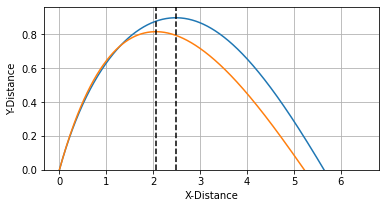

In [38]:
plt.figure(figsize=(6,3))
plt.plot(p1.x,p1.y)
plt.plot(p2.x,p2.y)
plt.axvline(p1.get_peak_x(), color='k', ls='--', label='Quadratic Friction')
plt.axvline(p2.get_peak_x(), color='k', ls='--', label='Linear Friction')
plt.ylim(bottom=0)
plt.grid()
plt.xlabel('X-Distance')
plt.ylabel('Y-Distance')
plt.show()